In [1]:
import os
import math
import random
import warnings
import numpy as np
import pandas as pd 
from sklearn import metrics
from matplotlib import pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [67]:
def plot_aa_count(data,filename):
    res=dict()
    for pep in list(data['PeptidesPassedNEHfilters.Peptide']):
        for c in pep:
            res[c.upper()]=res.get(c.upper(),0)+1
    res=np.array(sorted(res.items(),key= lambda item:item[1],reverse=True))

    plt.rc('font', size=14) 
    plt.figure(figsize=(13,9))  

    plt.barh(range(20),[int(x) for x in (res[:,1])],color='k',alpha=0.75)
    plt.yticks(range(20),res[:,0])

    for index, value in enumerate([int(x) for x in (res[:,1])]):
        plt.text(value, index,
                 str(value))

    plt.savefig(filename,dpi=900,bbox_inches='tight')
    plt.show()

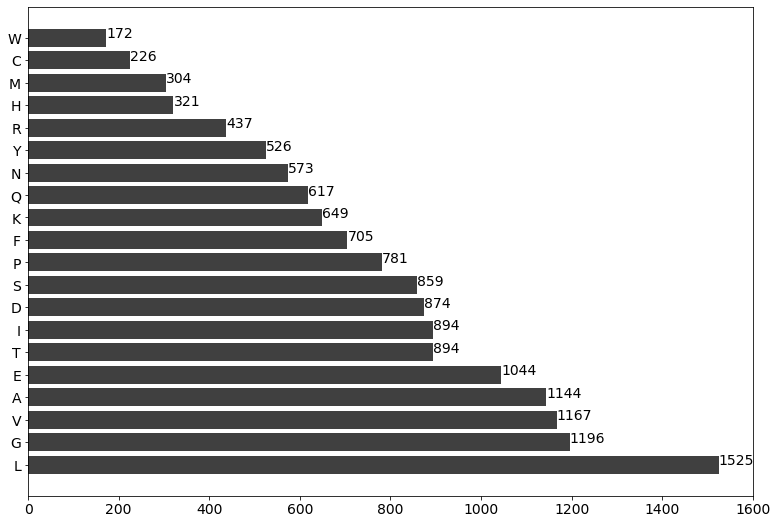

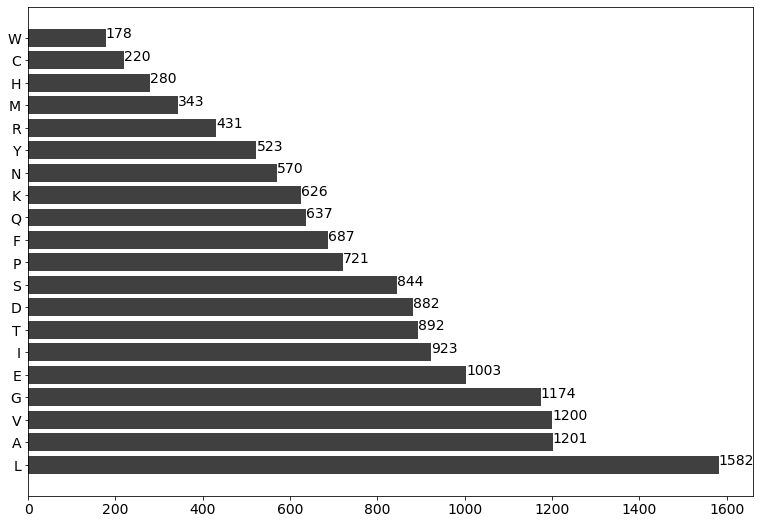

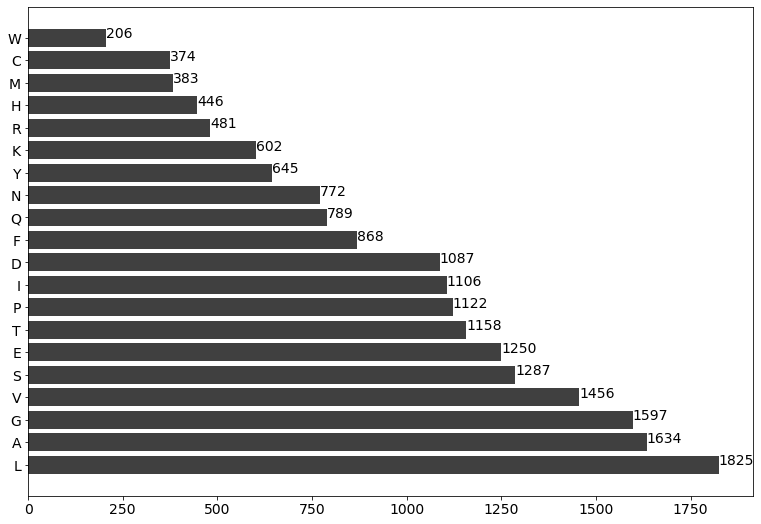

In [69]:
plot_aa_count(pd.read_csv(r"C:\Workplace\C#\Test\Test_test\ConsoleApp2\bin\Debug\mpe_1000.csv"),"mpe_aa_count.jpeg")
plot_aa_count(pd.read_csv(r"C:\Workplace\C#\Test\Test_test\ConsoleApp2\bin\Debug\ape_1000.csv"),"ape_aa_count.jpeg")
plot_aa_count(pd.read_csv(r"C:\Workplace\C#\Test\Test_test\ConsoleApp2\bin\Debug\asymp_1000.csv"),"asymp_aa_count.jpeg")

In [83]:
# data

In [101]:
data=pd.read_csv(r"C:\Workplace\C#\Test\Test_test\ConsoleApp2\bin\Debug\ape_mpe_aa.csv")
data1=pd.read_csv(r"C:\Workplace\C#\Test\Test_test\ConsoleApp2\bin\Debug\asymp_aa.csv")

data=data.sort_values(by='AAsInfo.AA_NEH_tritium')
data1=data1.sort_values(by='AAsInfo.AA_NEH_tritium')

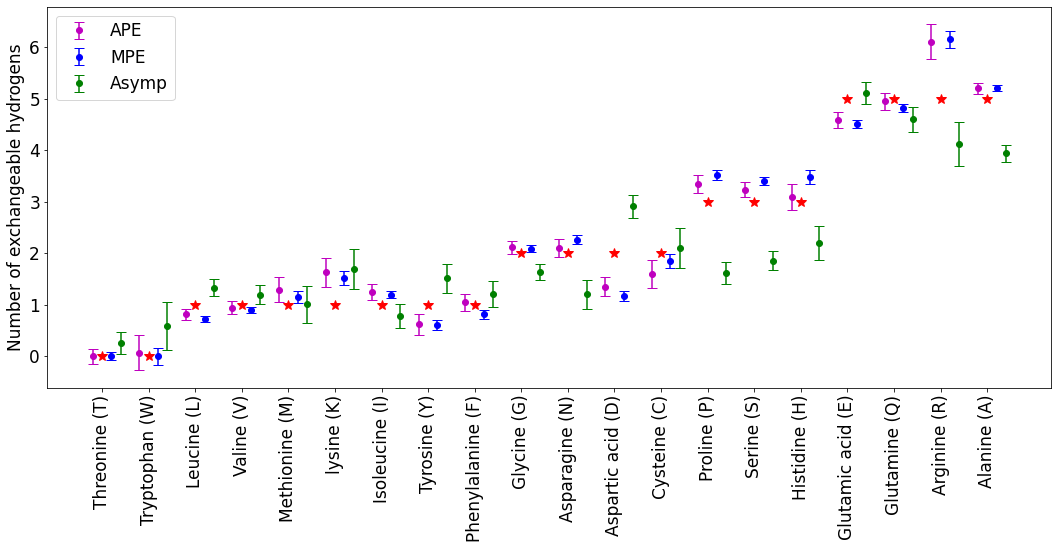

In [102]:
cis=[data['AAsInfo.AA_NEH_MPE_ci'],data['AAsInfo.AA_NEH_APE_ci'],data1['AAsInfo.AA_NEH_Asym_ci']]
aa_neh=[data['AAsInfo.AA_NEH_MPE'],data['AAsInfo.AA_NEH_APE'],data1['AAsInfo.AA_NEH_Asym']]

plt.rc('font', size=17) 
plt.rc('figure', figsize=(18,7)) 
plt.errorbar(range(0,40,2), data['AAsInfo.AA_NEH_tritium'], [0]*20,fmt ='*',mfc='r',color="r",ms=10)
cs=['m','b','g']
label=['APE', 'MPE','Asymp']

for i in range(3):
    col=aa_neh[i]
    col_ci=cis[i] 
    if i ==0: k=-1
    else: k= i

#     print("============> ",col,"\t")
    plt.errorbar([x+0.4*k for x in range(0,40,2)], col, col_ci,
                 fmt ='o',mfc=cs[i],color=cs[i],ms=6,label=label[i],capsize=5)

plt.xticks(range(0,40,2),data['AAsInfo.AA_name'],rotation=90)
plt.ylabel("Number of exchangeable hydrogens")    

plt.legend()
# plt.savefig(filename+"_CI.jpeg",dpi=900,bbox_inches='tight')
plt.show()
